In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from utils.udp_util import extract_udp_prague_to_dataframe
from utils.plotter import  plot_siftr_graph

In [2]:
# File paths

file_cubic = '../data/net_2025-06-04-07-59-36/iperf3_client_cubic_iperf3_d120.json'
file_prague = '../data/net_2025-06-04-07-59-36/iperf3_client_prague_iperf3_d120.json'

file_cubic = '../data/net_2025-06-04-09-38-12/iperf3_client_cubic_iperf3_d120.json'
file_prague = '../data/net_2025-06-04-09-38-12/iperf3_client_prague_iperf3_d120.json'



In [3]:
import json
import numpy as np
import pandas as pd

def extract_data_df(filename):
    with open(filename) as f:
        data = json.load(f)

    records = []

    for interval in data['intervals']:
        record = {
            'time': interval['sum']['start'],
            'bitrate_mbps': interval['sum']['bits_per_second'] / 1_000_000
        }

        stream = interval['streams'][0]
        if 'rtt' in stream:
            record['rtt_time'] = stream['start']
            record['rtt_ms'] = stream['rtt'] / 1000.0  # µs to ms
        else:
            record['rtt_time'] = None
            record['rtt_ms'] = None

        records.append(record)

    df = pd.DataFrame(records)
    return df


In [4]:



# Function to extract data from iperf3 JSON
def extract_data(filename):
    with open(filename) as f:
        data = json.load(f)

    times = []
    bitrates = []
    rtt_times = []
    rtts = []

    for interval in data['intervals']:
        times.append(interval['sum']['start'])
        bitrates.append(interval['sum']['bits_per_second'] / 1_000_000)  # Convert to Mbit/s

        stream = interval['streams'][0]
        if 'rtt' in stream:
            rtt_times.append(stream['start'])
            rtts.append(stream['rtt'] / 1000.0)  # µs to ms

    return np.array(times), np.array(bitrates), np.array(rtt_times), np.array(rtts)





import os
os.path.exists(file_prague)

# Extract data
t_prague, b_prague, rt_prague, rtt_prague = extract_data(file_prague)

In [5]:



# Function to extract data from iperf3 JSON
def extract_data(filename):
    with open(filename) as f:
        data = json.load(f)

    times = []
    bitrates = []
    rtt_times = []
    rtts = []

    for interval in data['intervals']:
        times.append(interval['sum']['start'])
        bitrates.append(interval['sum']['bits_per_second'] / 1_000_000)  # Convert to Mbit/s

        stream = interval['streams'][0]
        if 'rtt' in stream:
            rtt_times.append(stream['start'])
            rtts.append(stream['rtt'] / 1000.0)  # µs to ms

    return np.array(times), np.array(bitrates), np.array(rtt_times), np.array(rtts)





import os
os.path.exists(file_cubic)

# Extract data
t_cubic, b_cubic, rt_cubic, rtt_cubic = extract_data(file_cubic)

In [6]:
tfcubic = extract_data_df(file_cubic)

In [7]:
tfcubic.describe()

,time,bitrate_mbps,rtt_time,rtt_ms
count,120.000000,120.000000,120.000000,120.000000
mean,59.500116,120.822176,59.500116,15.278075
std,34.785061,37.708754,34.785061,3.478640
min,0.000000,51.082578,0.000000,6.311000
25%,29.750094,95.655883,29.750094,13.035250
50%,59.500091,120.937865,59.500091,15.506000
75%,89.250092,140.488101,89.250092,17.532250
max,119.000120,261.166510,119.000120,25.427000


In [8]:
tfprague = extract_data_df(file_prague)

In [9]:
tfprague.describe()

,time,bitrate_mbps,rtt_time,rtt_ms
count,120.000000,120.000000,120.000000,120.000000
mean,59.500134,126.205800,59.500134,15.223417
std,34.785033,34.509467,34.785033,3.538369
min,0.000000,62.916574,0.000000,7.250000
25%,29.750116,104.854241,29.750116,12.885250
50%,59.500091,125.828550,59.500091,15.289500
75%,89.250095,146.801336,89.250095,17.661000
max,119.000152,251.659245,119.000152,26.674000


In [10]:
tfcubic.rename(columns={'rtt_ms': 'SmoothedRTT'}, inplace=True)
tfcubic.rename(columns={'time': 'Time'}, inplace=True)

tfprague.rename(columns={'rtt_ms': 'SmoothedRTT'}, inplace=True)
tfprague.rename(columns={'time': 'Time'}, inplace=True)

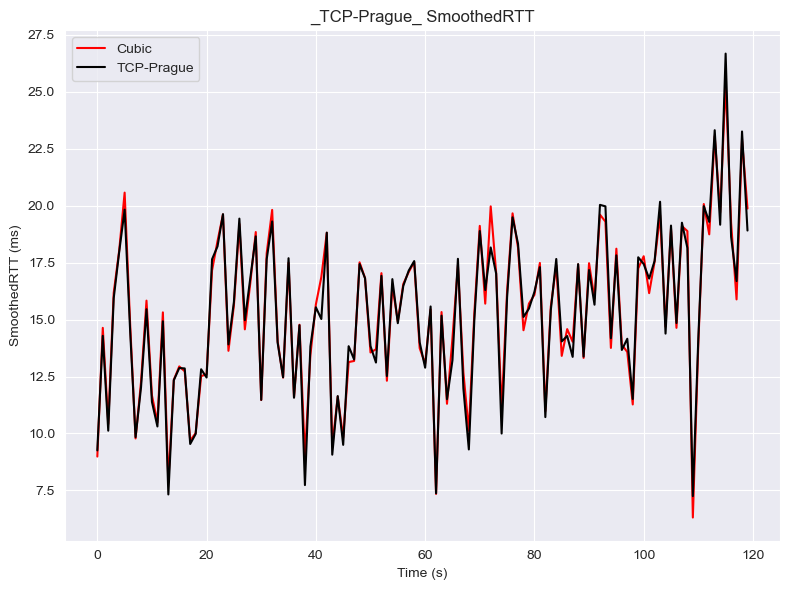

In [11]:
    # Define paths
paths = {
    "Cubic": tfcubic,
    "TCP-Prague": tfprague
}



scenario = str("_" + "TCP-Prague" + "_")

plot_siftr_graph(paths=paths,
                ycolumn="SmoothedRTT",
                title=f"{scenario} SmoothedRTT",
                xlabel="Time (s)",
                ylabel="SmoothedRTT (ms)",
                filename=f'{scenario}_SmoothedRTT',
                graph_directory="./",
)